# NLP 개발환경

딥러닝 개발환경을 꾸리는 것은 결코 쉬운 일이 아니고 상업적인 용도로 실제 제품을 만들기까지 많은 노력이 소요되는 것도 사실이다. 본격적인 개발에 들어가기에 앞서 구글에서 서비스하고 있는 [Colab](https://colab.research.google.com) 웹사이트에 접속하여 구글 크롬 웹브라우져를 개발환경으로 활용하는 것도 비용없이 딥러닝을 시작하는 분들에게 권하고 싶다.

즉, 기본적인 작업흐름은 크롬 웹브라우저로 [Colab](https://colab.research.google.com) 웹사이트에 접속하고 나서 딥러닝 개발에 필요한 하드웨어 자원(TPU, CPU, GPU)를 런타임으로 가상 컴퓨터를 할당 받는다. 할당된 가상 컴퓨터는 기본적인 파이썬 작업도구만 설정되어 있기 때문에 필요한 개발도구를 추가로 매직 명령어(`!`)를 활용하여 설치한 후에 후속 개발작업을 수행한다.

구글 Drive를 사용하는 경우 작성된 Colab 노트북이 구글 드라이브와 연결되어 코드를 따로 관리할 필요가 없다는 점은 장점이 된다. 하지만, 지속적인 버전 관리를 위해서는 GitHub과 연결 등 추가 작업은 별도로 필요하다.

<img src="fig/colab-drive-ide.png" width="77%"/>

## 구글 Colab 시작

딥러닝 개발에서 가장 먼저 해야될 작업중의 하나는 학습 속도를 높이기 위해서 프로세서를 변경하는 것이다. 이를 위해서는 먼저 Colab 노트북을 만들어야 한다. [Colab](https://colab.research.google.com)를 방문하여 손쉽게 구글 드라이브에 "Colab Notebooks" 디렉토리를 생성하고 나서 이곳에서 노트북을 새로 생성한다.

엔비디아 GPU, 혹은 구글 TPU 하드웨어를 구매한 후에 해당 드라이버와 개발환경을 꾸리는 것은 제법 전문적인 지식이 필요하다. 하지만, [Colab](https://colab.research.google.com)을 사용하면 매우 단순하게 클릭 몇번으로 GPU, TPU 하드웨어를 사용할 수 있다.

Colab 노트북을 하나 만들고 나서 런타임 GPU 설정을 해서 하드웨어 준비를 마무리 한다.

<img src="fig/colab-processor-change.png" width="77%"/>

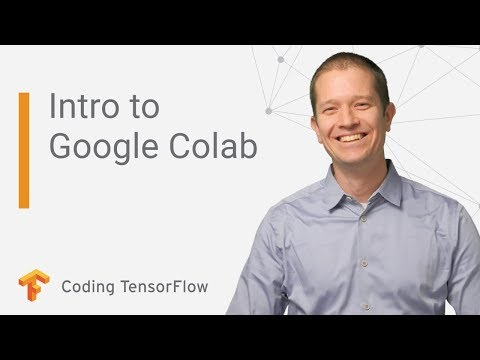

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI')

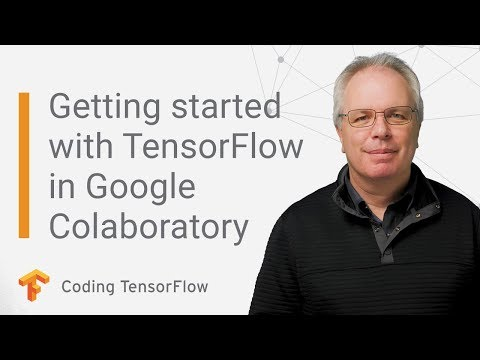

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('PitcORQSjNM')

## 텐서플로우 헬로우월드 

GPU 하드웨어가 준비되었다면 딥러닝 개발을 위한 밑단 GPU가 가동되는 텐서플로우를 설치한다.

`!pip install tensorflow-gpu`

설치를 완료한 후에 [텐서플로 2.0 시작하기: 초보자용](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko) 예제를 통해 헬로월드를 찍어본다.

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

## 허깅페이스 헬로우월드

딥러닝 개발을 위한 하드웨어 및 관련 IDE 설정이 되었다면, 다음 단계로 적절한 프레임워크를 고르는 것이 무척이나 중요하다. 사실 많은 프레임워크가 그동안 짧은 딥러능 전성기에도 나타나고 사라졌다. 현재 시점에서는 아마도 [허깅페이스(Hugging Face)](https://huggingface.co/transformers/index.html)가 아닐까 싶다. 물론 그 이면에는 Transformer가 가장 큰 역할을 했을테지만 말이다.

[huggingface.co 설치 페이지](https://huggingface.co/transformers/installation.html)를 참조하여 단순하게 설치작업을 수행한다. 딥러닝 작업을 수행할 프로세서 유형에 따라 적절한 허깅페이스 transformer를 설치한다. 앞서 Tensorflow 2.0을 설치했기 때문에 단순히 다음 명령어로 `transformers`만 설치하면 된다. 제대로 설치되었는지는 `transformers`에서 감성분석을 가져와서 제대로 감성점수가 뽑히는지를 확인한다.

`!pip install transformers`

`!python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('I hate you'))"`

`2020-09-02 00:13:51.445416: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Downloading: 100% 629/629 [00:00<00:00, 615kB/s]
Downloading: 100% 232k/232k [00:00<00:00, 1.14MB/s]
Downloading: 100% 230/230 [00:00<00:00, 194kB/s]
Downloading: 100% 268M/268M [00:04<00:00, 54.4MB/s]
[{'label': 'NEGATIVE', 'score': 0.9991129040718079}]`